In [9]:
import numpy

import constants
import rscha2d
import trig
import fibonacci_sphere
import coords

from matplotlib import pyplot

%matplotlib nbagg

In [55]:
theta_c, phi_c, theta_0d, theta_0 = numpy.deg2rad((90-42.0, 20.0, 26.0, 50.0))
knots = numpy.arange(-900, 2000, 200) 

In [63]:
model = rscha2d.Model()
model.set_model_params(theta_c, phi_c, theta_0d, 0.1, 2, 2, 1, knots=knots)
model.add_data("../data/rscha2d/bd_shaq.dat")

In [64]:
g = model.solve()

In [65]:
theta_m, phi_m = fibonacci_sphere.grid(5000)
in_cap = trig.angulardist(theta_m, phi_m, theta_c, phi_c) < theta_0d
theta_m = theta_m[in_cap]; phi_m = phi_m[in_cap]

# theta_m, phi_m = model.theta_geo, model.phi_geo
r_m = numpy.ones_like(theta_m)*constants.a_r
times_d, r_d, theta_d, phi_d = coords.anything(r_m, theta_m, phi_m, knots)

In [66]:
# Dm, Im, Fm = model.synth_data(model.tv, model.r_geo, model.theta_geo, model.phi_geo, g)
Dm, Im, Fm = model.synth_data(times_d, r_d, theta_d, phi_d, g)

In [67]:
Dm = trig.mindiff(Dm, 0)
Im = trig.mindiff(Im, 0)

In [71]:
D_rem, I_rem, F_rem = model.synth_data(model.tv, model.r_geo, model.theta_geo, model.phi_geo, g)
D_rem = trig.mindiff(D_rem, 0)
I_rem = trig.mindiff(I_rem, 0)

<IPython.core.display.Javascript object>


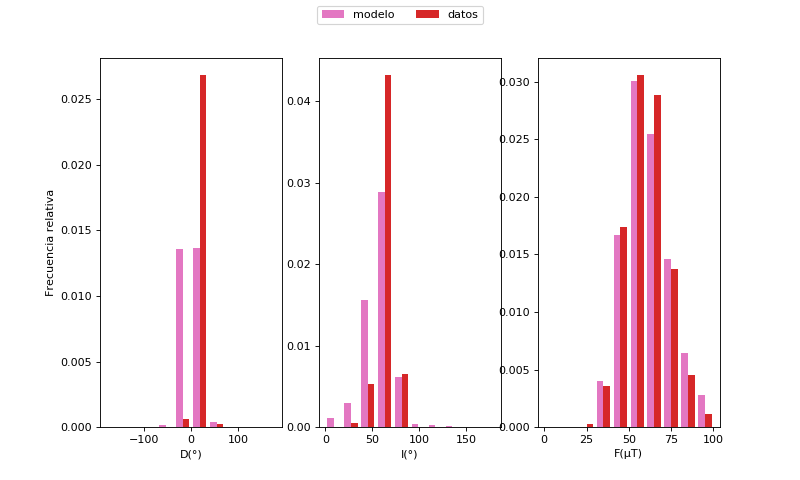

In [68]:
fig, axes = pyplot.subplots(nrows=1, ncols=3, figsize=(10, 6))

axes[0].hist((numpy.rad2deg(Dm), numpy.rad2deg(model.D_o)), color=("C6", "C3"),
             label=("modelo", "datos"), range=(-180, 180), normed=True)
axes[0].set_xlabel("D(°)")
axes[1].hist((numpy.rad2deg(Im), numpy.rad2deg(model.I_o)), color=("C6", "C3"),
             range=(-0, 180), normed=True)
axes[1].set_xlabel("I(°)")
axes[2].hist((Fm, model.F_o), color=("C6", "C3"),
             range=(0, 100), normed=True)
axes[2].set_xlabel("F(μT)")
axes[0].set_ylabel("Frecuencia relativa")

fig.legend(*axes[0].get_legend_handles_labels(), 'upper center', ncol=2)

pyplot.show(fig)
fig.savefig("../data/rscha2d/distribucion.png", frameon=True)

#### hay que regularizar esto seguramente -- la maldición de la muerte continúa

<IPython.core.display.Javascript object>


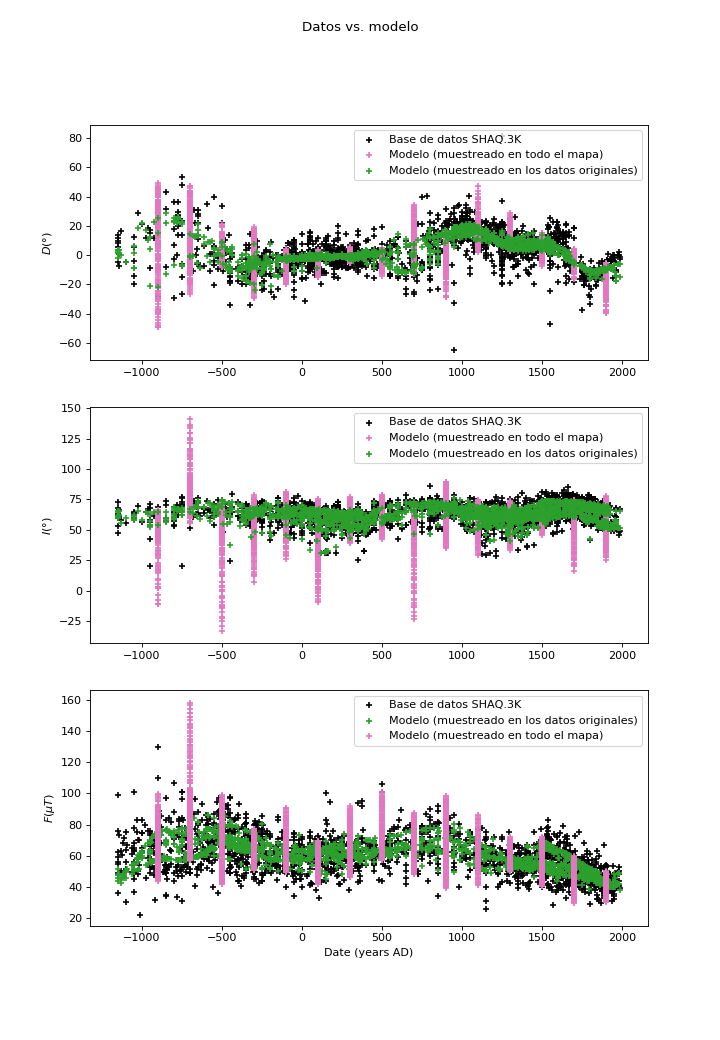

In [77]:
fig, (ax0, ax1, ax2) = pyplot.subplots(3, 1, figsize = (9,13))
ax0.scatter(model.tv[~model.nan_D], numpy.rad2deg(trig.mindiff(model.D_o[~model.nan_D], 0)),
            marker="+", color="black", label="Base de datos SHAQ.3K")
ax0.scatter(times_d, numpy.rad2deg(Dm),
            marker="+", color="C6", label="Modelo (muestreado en todo el mapa)")
ax0.scatter(model.tv[~model.nan_D], numpy.rad2deg(D_rem)[~model.nan_D],
            marker="+", color="C2", label="Modelo (muestreado en los datos originales)")
ax1.scatter(model.tv[~model.nan_I], numpy.rad2deg(trig.mindiff(model.I_o[~model.nan_I], 0)),
            marker="+", color="black", label="Base de datos SHAQ.3K")
ax1.scatter(times_d, numpy.rad2deg(Im),
            marker="+", color="C6", label="Modelo (muestreado en todo el mapa)")
ax1.scatter(model.tv[~model.nan_I], numpy.rad2deg(I_rem)[~model.nan_I],
            marker="+", color="C2", label="Modelo (muestreado en los datos originales)")
ax2.scatter(model.tv[~model.nan_F], model.F_o[~model.nan_F], marker="+", color="black",
           label="Base de datos SHAQ.3K")
ax2.scatter(model.tv[~model.nan_F], F_rem[~model.nan_F], marker="+", color="C2",
           label="Modelo (muestreado en los datos originales)")
ax2.scatter(times_d, Fm, marker="+", color="C6", label="Modelo (muestreado en todo el mapa)")

ax0.set_ylabel("$D (°)$")
ax0.legend()
ax1.set_ylabel("$I (°)$")
ax1.legend()
ax2.set_ylabel("$F (\mu T)$")
ax2.legend()
ax2.set_xlabel("Date (years AD)")

fig.suptitle("Datos vs. modelo")
pyplot.show(fig)